In [6]:
import pandas as pd 
import wandb

In [7]:
wandb.login()

True

In [9]:
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = [
    api.run("drigba/Medical Image Segmentation/nuu3j9vb"),
    api.run("drigba/Medical Image Segmentation/3amh5fex")
]

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

    run.history()

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df

,summary,config,name
0,{'gradients/graph_6encoder.layer1.2.bn2.bias':...,{},unet_model
1,{'gradients/prediction_model.encoder.layer3.1....,{},quadrunet_4unet_model


In [35]:
run = api.run("drigba/Medical Image Segmentation/nuu3j9vb")
cols = ['_runtime', 'epoch', 'train_loss_epoch', 'val_loss', 'val_dice']
history = run.history()[cols]


In [37]:
history.iloc[-2]

_runtime            883.171206
epoch                28.000000
train_loss_epoch           NaN
val_loss              0.199936
val_dice              0.743554
Name: 195, dtype: float64

In [53]:
runs = [
    api.run("drigba/Medical Image Segmentation/nuu3j9vb"),
    api.run("drigba/Medical Image Segmentation/3amh5fex"),
    api.run("drigba/Medical Image Segmentation/wy5zdcup"),
]

df = pd.DataFrame(columns=['name', 'runtime', 'epochs', 'train_loss', 'val_loss', 'val_acc', 'val_dice'])

for run in runs:
    cols = ['_runtime', 'epoch', 'train_loss_epoch', 'val_loss', 'val_acc', 'val_dice']
    history = run.history()[cols]

    last_row = history.iloc[-1]
    one_before_last_row = history.iloc[-2]

    result_dict = {
        'name': run.name,
        'runtime': last_row['_runtime'],
        'epochs': last_row['epoch'],
        'train_loss': last_row['train_loss_epoch'],
        'val_loss': one_before_last_row['val_loss'],
        'val_acc': one_before_last_row['val_acc'],
        'val_dice': one_before_last_row['val_dice'],
    }

    df = df.append(result_dict, ignore_index=True)

df

,name,runtime,epochs,train_loss,val_loss,val_acc,val_dice
0,unet_model,883.671085,28.0,0.134382,0.199936,0.984769,0.743554
1,quadrunet_4unet_model,2813.769451,23.0,0.153597,0.211253,0.985604,0.751159
2,fcn_model,1221.864747,17.0,0.143292,0.224745,0.983768,0.730247


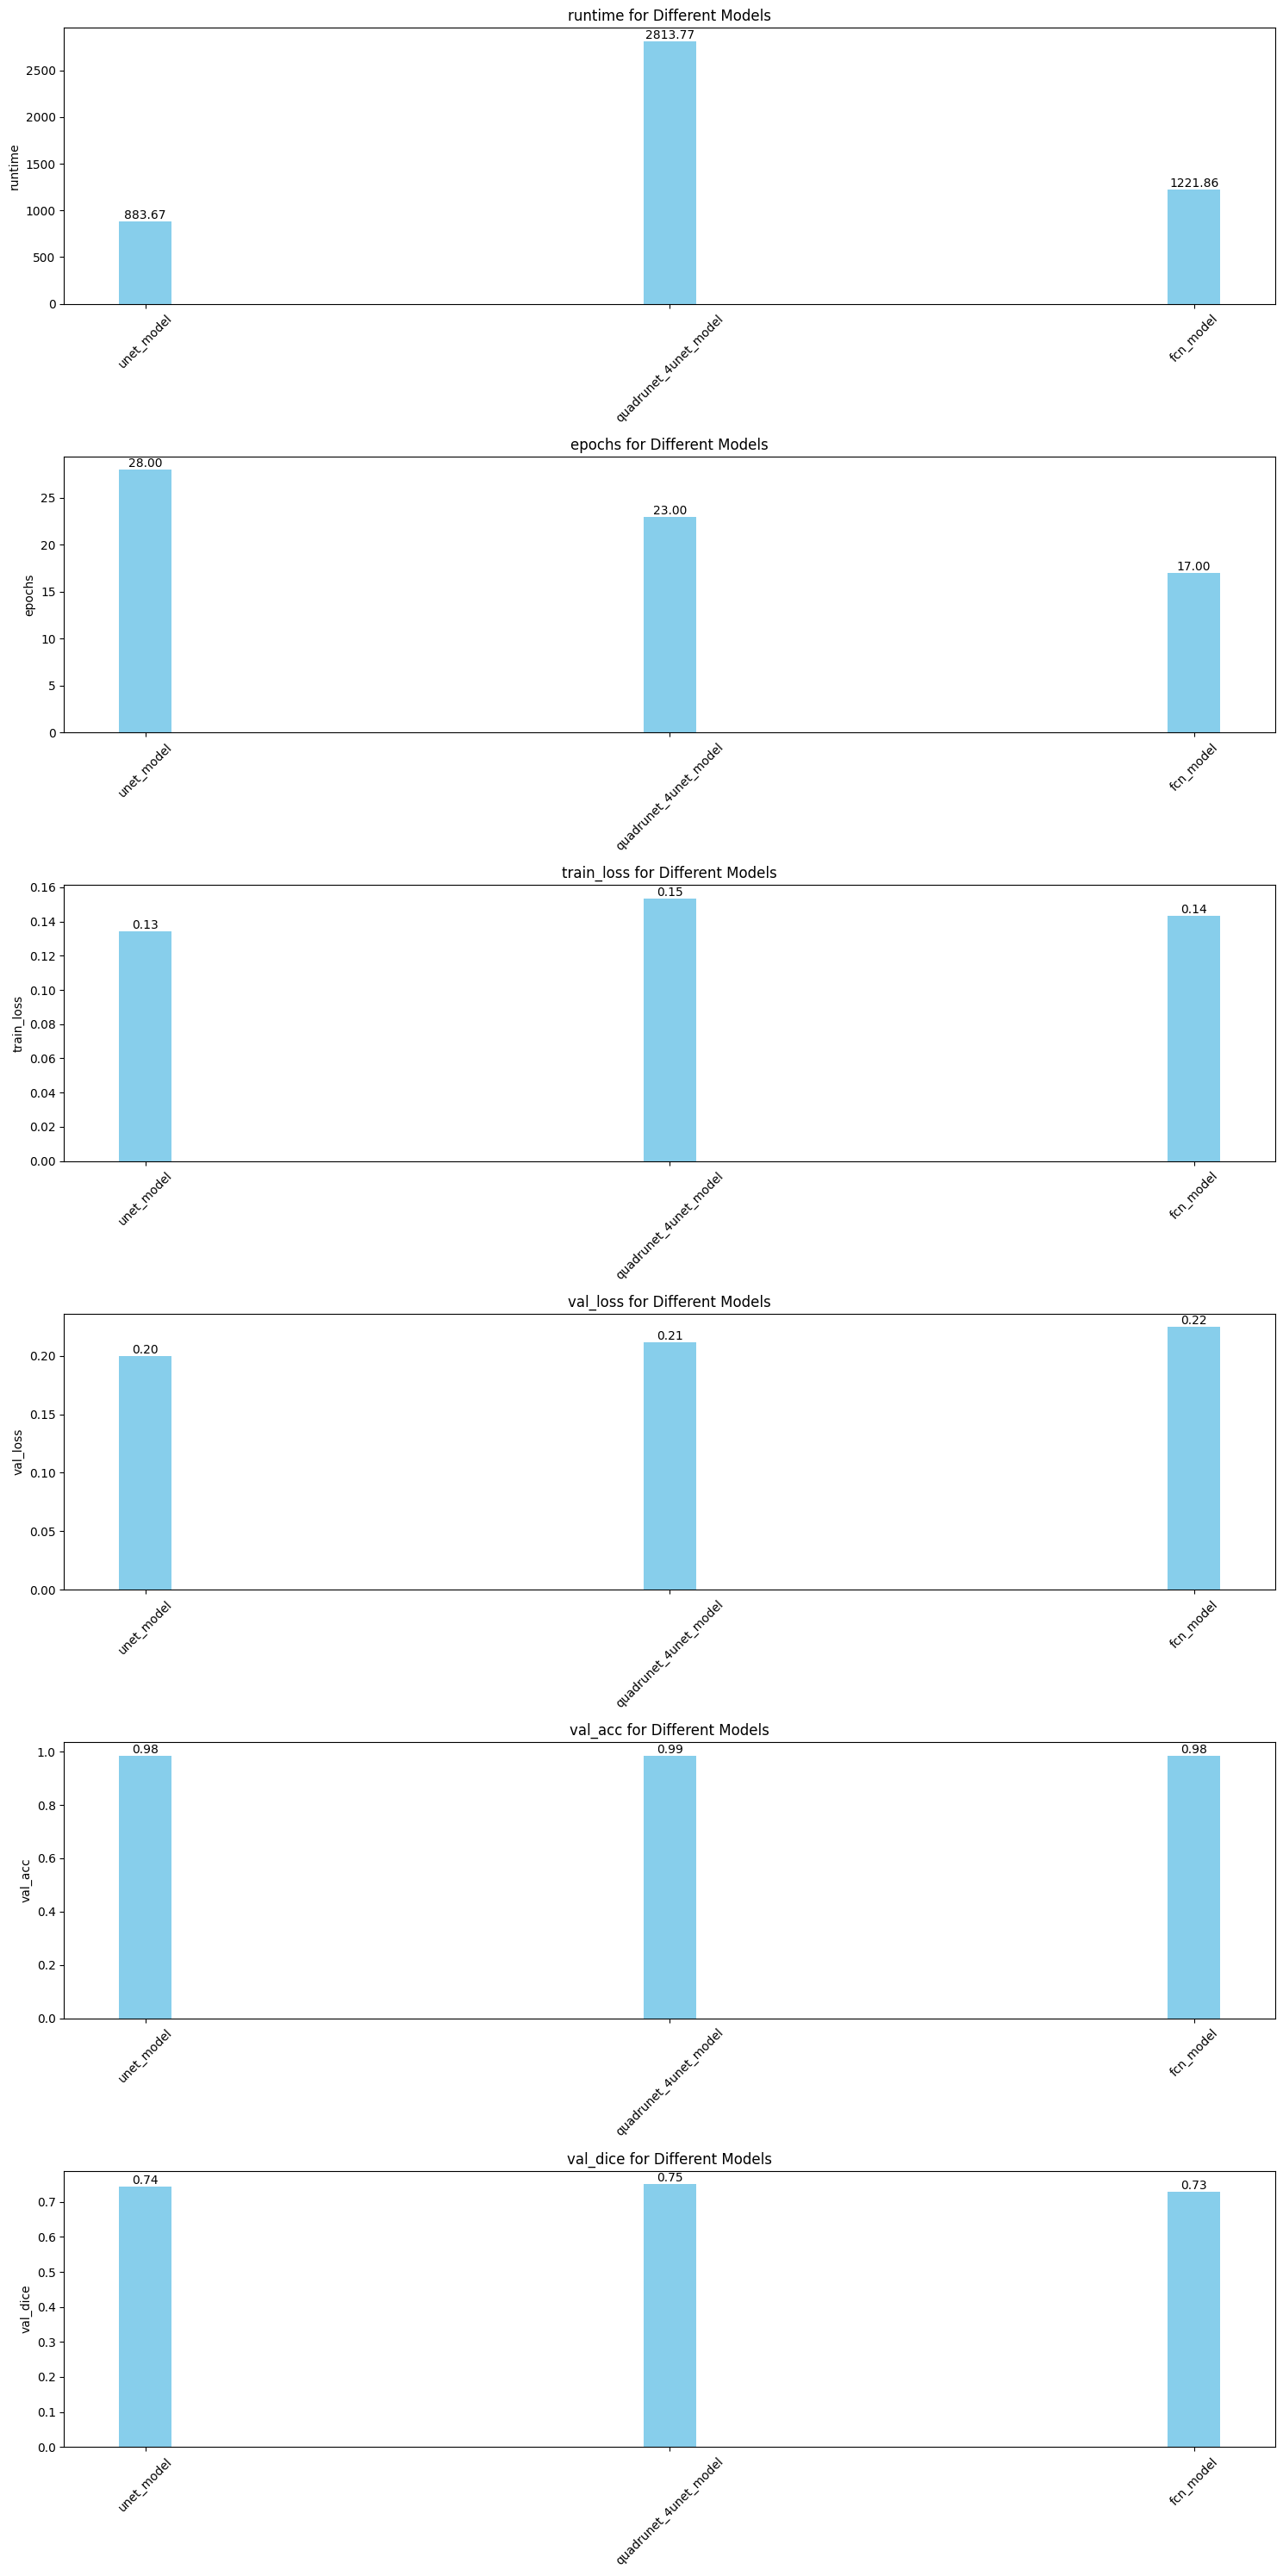

In [61]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(6, 1, figsize=(15, 30))

for i, column in enumerate(df.columns[df.columns != 'name']):
    axs[i].bar(df['name'], df[column], color='skyblue', width=0.1)
    axs[i].set_ylabel(column)
    axs[i].set_title(f'{column} for Different Models')
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability if needed

    # Write value to the bar
    for j, value in enumerate(df[column]):
        axs[i].text(j, value, format(value, '.2f'), ha='center', va='bottom')

plt.tight_layout()
plt.show()